*Demodulation.ipynb*
> 01/08/2019
>
> This Notebook simulates the demodulation of a sinewave
> It shows that the demodulator acts as a phase comparator and it highlights the impact of processing the module of the demodulation or its real part only.


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to apply a low pass filter
def smooth(x,window_len=11,window='hanning'):

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [3]:
# General parameters
fs=20e6 # sampling frequency
npts=2**12 # length of the simulation
t=np.arange(npts)/fs
f=0.7e6 # frequency of the signal

In [4]:
# Function to plot the signals in frequency domain
def ax_plot_freq(ax, sig, f, xtit, ytit, label):
    ax.plot(f/1e6,sig,marker='o',label=label)
    ax.set_xlabel(xtit)
    ax.set_ylabel(ytit)
    ax.legend(loc='best')
    ax.axis([-0.04,4,0,2400])

In [5]:
def fig_plot_freq(fig_id, figtitle, sig, sig_demod, sigF):

    sig_demodF=np.abs(np.fft.fft(sig_demod))
    sig_demodfilt=smooth(sig_demod,101)
    sig_demodfiltF=np.abs(np.fft.fft(sig_demodfilt))

    fig=plt.figure(fig_id,(14,8))
    ax=fig.add_subplot(2,1,1)
    label1='Input signal'
    label2='Demodulated signal'
    label3='Demodulated-filtered signal'
    ax.plot(sig, label=label1)
    ax.plot(sig_demod, label=label2)
    ax.plot(sig_demodfilt, label=label3)
    ax.legend(loc='best')
    ax.axis([1000,1300,-1.2, 1.2])
    ax.set_xlabel('Sample')

    l=int(len(sigF)/2)
    freqs=np.linspace(0, fs/2, l)
    xtit='Frequency (MHz)'
    ytit='Amplitude (A.U.)'

    ax1=fig.add_subplot(2,3,4)
    ax_plot_freq(ax1, sigF[0:l], freqs, xtit, ytit, label=label1)

    ax2=fig.add_subplot(2,3,5)
    ax_plot_freq(ax2, sig_demodF[0:l], freqs, xtit, ytit, label=label2)

    ax3=fig.add_subplot(2,3,6)
    ax_plot_freq(ax3, sig_demodfiltF[0:l], freqs, xtit, ytit, label=label3)

    fig.suptitle(figtitle, fontsize=16, y=1.02)

    fig.tight_layout()

In [6]:
# Processing signal
A=1.
Phi=np.pi*3/4
sig=A*np.sin(2*np.pi*f*t+Phi)
sigF=np.abs(np.fft.fft(sig))

demodI=np.sin(2*np.pi*f*t)
demodQ=np.sin(2*np.pi*f*t+np.pi/2)

sig_demodI=sig*demodI
sig_demodQ=sig*demodQ

In [7]:
def phase_plot(sig_demodI, sig_demodQ, Phi):
    sig_demodIfilt=smooth(sig_demodI,101)[100:-100]
    sig_demodQfilt=smooth(sig_demodQ,101)[100:-100]

    phase=np.arctan2(sig_demodQ, sig_demodI)
    phasefilt=np.arctan2(sig_demodQfilt, sig_demodIfilt)

    fig=plt.figure(1,(14,8))
    ax1=fig.add_subplot(3,1,1)
    ax1.plot(sig_demodI, marker='.', label='Unfiltered')
    ax1.plot(sig_demodIfilt, marker='.', label='Filtered')
    ax1.legend(loc='best')
    ax1.set_ylabel('Real part (A.U.)')
    ax1.axis([1000,1100,-1.2,1.2])

    ax2=fig.add_subplot(3,1,2)
    ax2.plot(sig_demodQ, marker='.', label='Unfiltered')
    ax2.plot(sig_demodQfilt, marker='.', label='Filtered')
    ax2.legend(loc='best')
    ax2.set_ylabel('Imaginary part (A.U.)')
    ax2.axis([1000,1100,-1.2,1.2])

    ax3=fig.add_subplot(3,1,3)
    ax3.plot(phase, marker='.', label='Unfiltered')
    ax3.plot(phasefilt, marker='.', label='Filtered')
    ax3.legend(loc='best')
    ax3.set_xlabel('Sample')
    ax3.set_ylabel('Phase (Rad)')
    ax3.axis([1000,1100,-np.pi,np.pi])
    
    fig.tight_layout()

    fig=plt.figure(2,(8,8))
    ax1=fig.add_subplot(1,1,1)
    ax1.plot(sig_demodI, sig_demodQ, marker='.', label='Unfiltered')
    ax1.plot(sig_demodIfilt, sig_demodQfilt, marker='.', label='Filtered')
    ax1.legend(loc='best')
    ax1.set_xlabel('Real part (A.U.)')
    ax1.set_ylabel('Imaginary part (A.U.)')
    ax1.axis([-1,1,-1,1])
    # Major ticks every 20, minor ticks every 10
    ax1.grid(color='k', linestyle=':', linewidth=0.5)
    texte='Simulated phase={0:6.3f}rad\nMeasured phase={1:6.3f}rad'.format(Phi, phasefilt[100:-100].mean())
    ax1.text(0, -0.9, texte)
    fig.tight_layout()


_Demodulation of a sine wave:_

The plot below shows the input signal with the result of the demodulation.
In this first simulation we consider the amplitude of the demodulated signal i.e. sqrt(real^2+im^2) as the output of the demodulation. On the spectrum of the demodulated signal we observe that the signal has been shifted to the DC (as expected) and at twice the frequency of the input signal (which is expected also). On top of that we also have a small third harmonic.

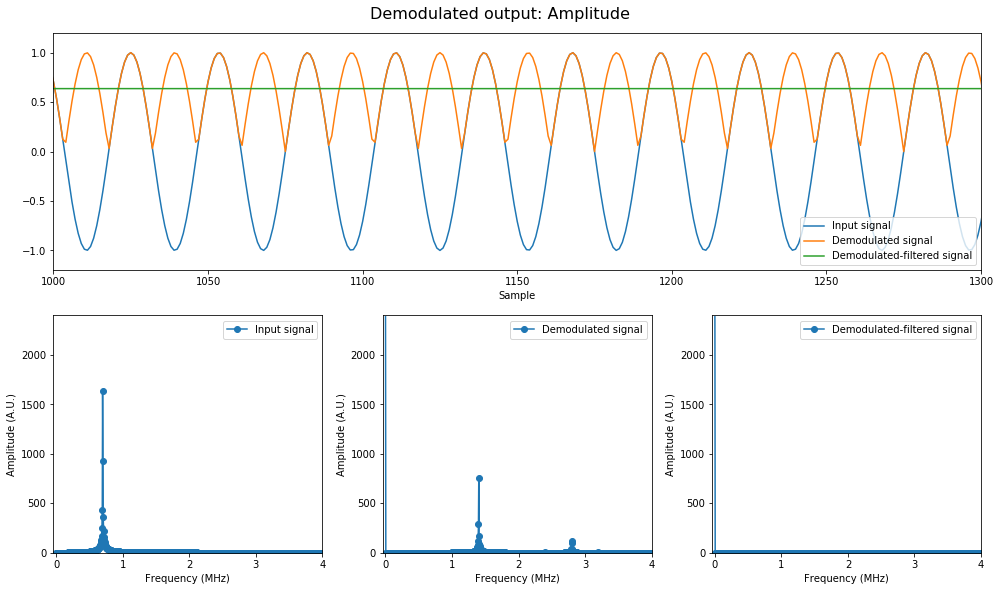

In [8]:
# Demodulation from the amplitude
sig_demod=np.sqrt(sig_demodI**2+sig_demodQ**2)
fig_plot_freq(4, 'Demodulated output: Amplitude',  sig, sig_demod, sigF)

The plot below shows the input signal with the result of the demodulation.
In this second simulation we consider the real part of the demodulated signal as the output of the demodulation. On the spectrum of the demodulated signal we observe that the signal has been shifted to the DC (as expected) and at twice the frequency of the input signal (which is expected also). There are no other harmonics in the spectrum.

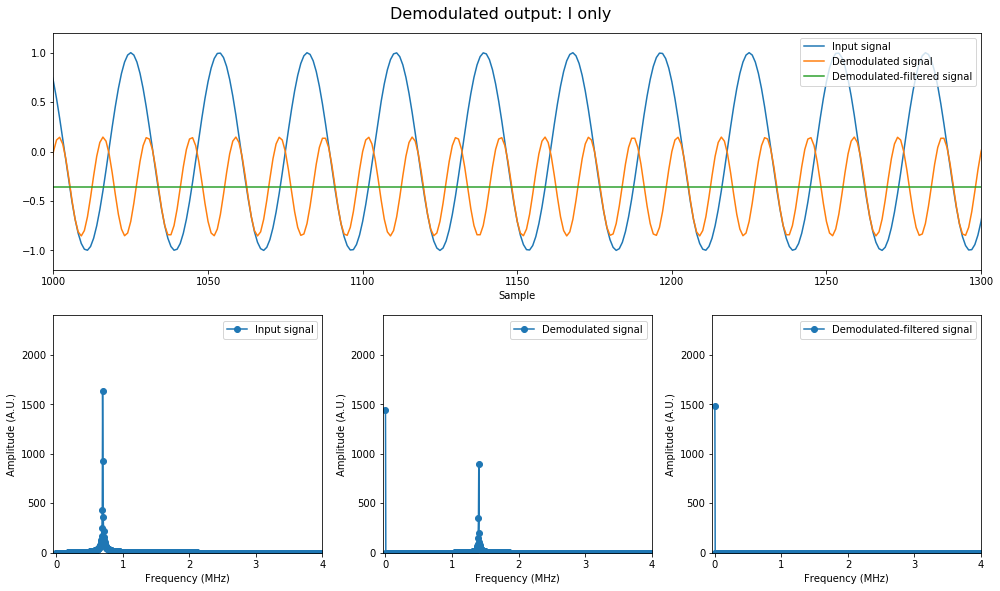

In [9]:
# Demodulation from I only
sig_demod=sig_demodI
fig_plot_freq(3, 'Demodulated output: I only\n', sig, sig_demod, sigF)

_Measurement of the phase:_

The demodulator acts as a phase comparator. The plots below show the real and the imaginary part at the output of the demodulation as well as their phase. Only the DC level has to be taken into account (a low pass filter has been applied on I and Q). The phase of the demodulated signal is a good measurement of the input signal phase (wrt the demodulation signals).

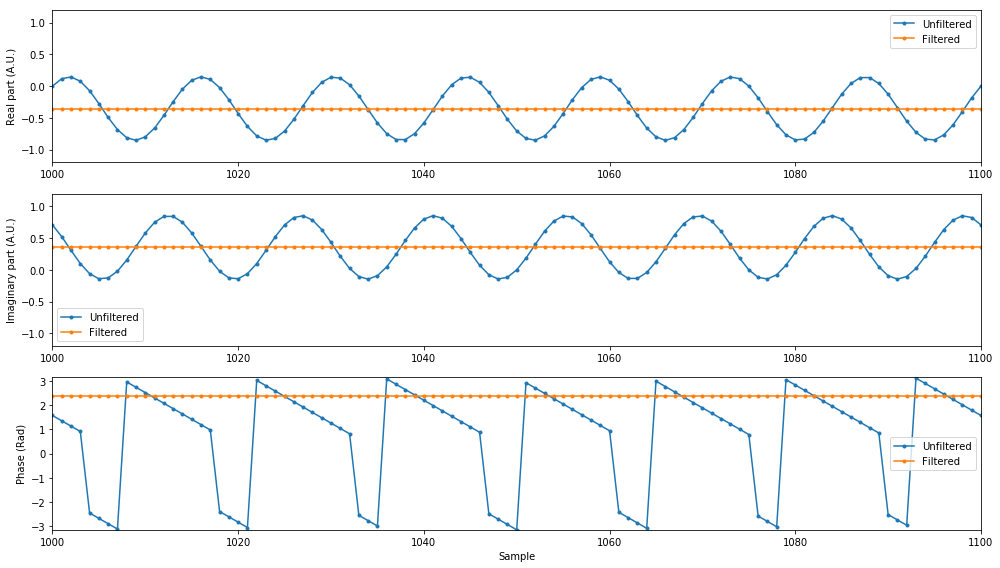

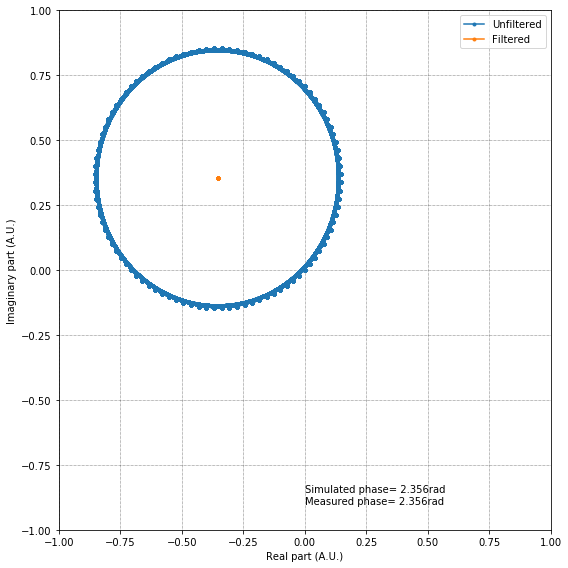

In [26]:
phase_plot(sig_demodI, sig_demodQ, Phi)